In [183]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
#from tensorflow.examples.tutorials.mnist import input_data

In [185]:
#minst = input_data.read_data_sets('minst_data/')

In [186]:
def imageshow(digit):
    plt.imshow(digit.reshape(28, 28), cmap='Greys', interpolation='nearest')

In [187]:
training_images, training_labels = minst.train.next_batch(50)
test_images, test_labels = minst.test.next_batch(5)


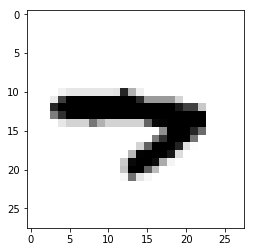

In [188]:
imageshow(training_images[4])

In [189]:
training_labels[:5]

array([3, 4, 0, 9, 7], dtype=uint8)

In [190]:
training_labels.shape


(50,)

In [191]:
tf.reset_default_graph()

In [192]:
training_images_pl = tf.placeholder('float', [None, 784])
test_images_pl = tf.placeholder('float', [784])

In [193]:
def get_majority_predicated_label(labels, indices):
    
    predicated_labels =[]
    
    for i in indices:
        predicated_labels.append(labels[i])
        
    predicated_labels = np.array(predicated_labels)
    
    print(predicated_labels)
    
    counts  = np.bincount(predicated_labels)
    
    return np.argmax(counts)
    
    

In [194]:
#l1_distance = tf.abs(tf.subtract(training_images_pl, test_images_pl))

In [195]:
#l1_distance.shape

In [196]:
#distance_l1= tf.reduce_sum(l1_distance, axis=1)

In [197]:
#pred_top_knn = tf.nn.top_k(tf.negative(distance_l1), k=5)

In [198]:
l2_distance = tf.square(tf.subtract(training_images_pl, test_images_pl))
distance_l2 = tf.sqrt(tf.reduce_sum(l2_distance, axis=1))
pred_top_knn= tf.nn.top_k(tf.negative(distance_l2), k=5)

In [199]:
accuracy = 0

In [200]:
init = tf.global_variables_initializer()

In [201]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(len(test_images)):
        a, indices = sess.run(pred_top_knn, feed_dict= {training_images_pl : training_images,
                                                       test_images_pl :test_images[i,:]} )
        predicted_label = get_majority_predicated_label(training_labels, indices)
        print(a)
        print("Test: ", i, "Predicated: ", predicted_label,
              "Actual:" , test_labels[i])
        
        if predicted_label == test_labels[i]:
            accuracy +=1./len(test_images)
            
    print ("Done")
    print("Accuracy:" , accuracy)
    
    writer = tf.summary.FileWriter("./digit_prediction", sess.graph)

    writer.close()

[6 5 2 0 1]
[-8.200473 -8.293026 -8.361895 -8.479114 -8.511912]
Test:  0 Predicated:  0 Actual: 8
[2 4 6 6 3]
[ -7.8516173 -10.037435  -10.531286  -10.568908  -10.752985 ]
Test:  1 Predicated:  6 Actual: 2
[8 1 8 1 2]
[-7.341782  -7.9147964 -7.9365187 -8.018409  -8.029023 ]
Test:  2 Predicated:  1 Actual: 8
[1 1 1 1 7]
[-6.106938  -6.294488  -6.454651  -6.597559  -7.2039275]
Test:  3 Predicated:  1 Actual: 9
[7 4 1 1 1]
[-6.658415  -7.5249157 -7.6792536 -7.786364  -7.966452 ]
Test:  4 Predicated:  1 Actual: 9
Done
Accuracy: 0
